# Project : Text Classification

Only 25% data is structured . Other 75% data is generated as we speak , as we write , as images and videos . All the big and small organizations value these data a lot . Crores of text generated everyday so it is impossible to classify them manually or to understand the sentiment of a user.

NLP or Natural Language Processing is a branch of AI and Machine learning which is most essential for texts classification , speech recognition , sentiment analysis and other text related tasks .

In this project i have used a dataset which has reviews of users about some games , apps and other platforms . Rating is our target variable in this project . I have used most of the text cleaning techniques and run this model with 5 algorithms to see which is giving us the highest accuracy . This project has got an accuracy of 94.16% . Please have a look at it for further analysis .

In [ ]:
import numpy as np ## Importing numpy library for data analysis .
import pandas as pd ## Importing Pandas library for data analysis .
import matplotlib.pyplot as plt ## Importing matplotlib library for data visualization .
import seaborn as sns  ## Importing seaborn library for data visualization .
import plotly.express as px  ## Importing plotly express for advance data visualization .

In [ ]:
Twitter_raw=pd.read_csv("/content/twitter_training.csv")
tweet=Twitter_raw.copy() ## Create a copy of our dataset for further analysis .
tweet.head() ## head function will show us the top 5 rows .

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
tweet.columns ## columns function will show the name of all columns .

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
## Renaming some columns to make it more robust and easy to understand .
tweet=tweet.rename(columns={'2401':'ID','Borderlands':'Platform','Positive':'Rating',
                            'im getting on borderlands and i will murder you all ,':'Review'})
tweet.head() ## head function will show us the top 5 rows .

,ID,Platform,Rating,Review
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
tweet.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        74681 non-null  int64 
 1   Platform  74681 non-null  object
 2   Rating    74681 non-null  object
 3   Review    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
## Created a for loop to see the percentage of null values in all column .
for i in tweet.columns :
  print(f"Percentage of null values in {i} :", (tweet[i].isnull().sum()*100)/len(tweet[i]))

Percentage of null values in ID : 0.0
Percentage of null values in Platform : 0.0
Percentage of null values in Rating : 0.0
Percentage of null values in Review : 0.9185736666622032


In [ ]:
tweet.Rating.value_counts() ## Value_counts will show the total count of all distinct values in a column .

Rating
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [ ]:
Platform_counts=tweet.Platform.value_counts() ## Value_counts will show the total count of all distinct values in a column .
## Barplot to see the total count of each distint values .
fig=px.bar(Platform_counts,y='count',width=1000,height=800,
           title='Total counts of different platforms',labels={'count':'Total_count'})
fig.show()

In [ ]:
Negative_rating=tweet[tweet.Rating=='Negative'] ## Using filter method to fetch the matching rows .
Negative_rating.shape ## shape function will show total no of rows and columns .

(22542, 4)

In [ ]:
Negative_platforms=Negative_rating.Platform.value_counts() ## Value_counts will show the total count of all distinct values in a column .
## Barplot to see the total count of each distint values .
fig=px.bar(Negative_platforms,y='count',width=1050,height=750,
           title='Total count of different platforms when the rating is negative', labels={'count':'Total_count'})
fig.show()

**Most and Least negative rating :**

MaddenNFL has 1710 negative ratings which is the highest and RedDeadRedemptlon(RDR) got 306 negative ratings which is lowest .

In [ ]:
Positive_rating=tweet[tweet.Rating=='Positive'] ## Using filter method to fetch the matching rows .
Positive_rating.shape ## shape function will show total no of rows and columns .

(20831, 4)

In [ ]:
positive_platforms=Positive_rating.Platform.value_counts() ## Value_counts will show the total count of all distinct values in a column .
## Barplot to see the total count of each distint values .
fig=px.bar(positive_platforms,y='count',width=1050,height=750,
           title='Total count of different platforms when the rating is positive', labels={'count':'Total_count'})
fig.show()

**Most and Least Positive rating :**

AssassinsCreed has got 1710 positive ratings which is the highest and Facebook got 174 Positive ratings which is lowest .

In [ ]:
neutral_irrelevant=tweet[(tweet['Rating']=='Neutral') | (tweet['Rating']=='Irrelevant')] ## Using filter method to fetch the matching rows .
neutral_irrelevant.shape  ## shape function will show total no of rows and columns .

(31308, 4)

In [ ]:
neutral_irrelevant_platform=neutral_irrelevant.Platform.value_counts() ## Value_counts will show the total count of all distinct values in a column .
## Barplot to see the total count of each distint values .
fig=px.bar(neutral_irrelevant_platform,y='count',width=1050,height=750,
           title='Total count of different platforms when the rating is neutral or irrelevant', labels={'count':'Total_count'})
fig.show()

**Most and Least Neutral or irrelevant rating :**

Facebook has got 1476 Neutral or irrelevant ratings which is the highest and MaddenNFL got 294 Neutral or irrelevant ratings which is lowest .

In [ ]:
tweet=tweet.dropna() ## Using dropna function to drop all null values .
tweet.isnull().sum() ## isnull().sum() will calculate and show us total no of null or nan values for each column .

ID          0
Platform    0
Rating      0
Review      0
dtype: int64

Neutral and Irrelevant ratings doesn't make any sense in this project . We need to classify our reviews between Positive and Negative and that's why i have make all those rows null where the rating is either neutral or irrelevant and then drop them .

In [ ]:
tweet[tweet.Rating=='Neutral']=np.nan ## Converting some rows into null using np.nan function .
tweet[tweet.Rating=='Irrelevant']=np.nan ## Converting some rows into null using np.nan function .

<ipython-input-16-8c56c64b0e7a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tweet.isnull().sum() ## isnull().sum() will calculate and show us total no of null or nan values for each column .

ID          30983
Platform    30983
Rating      30983
Review      30983
dtype: int64

In [ ]:
new_tweet=tweet.dropna() ## Dropping some unnecessary columns with drop function .
new_tweet.shape ## shape function will show total no of rows and columns .

(43012, 4)

In [ ]:
new_tweet.Rating.value_counts() ## Value_counts will show the total count of all distinct values in a column .

Rating
Negative    22358
Positive    20654
Name: count, dtype: int64

In [ ]:
new_tweet.head() ## head function will show us the top 5 rows .

,ID,Platform,Rating,Review
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
import re

This clean_text function will convert all the texts to lower , remove extra spaces and it will remove numbers and 'http//' from the text .

In [ ]:
## Created a function for text cleaning using re .
def clean_text(text) :
  text=text.lower()
  text=text.strip()
  text=re.sub(r'\w*\d\w*','',text)
  text=re.sub('http//*','',text)

  return text

In [ ]:
new_tweet['Clean_review']=new_tweet['Review'].apply(clean_text).astype(str)
new_tweet.head() ## head function will show us the top 5 rows .

<ipython-input-23-3f3cdee6ad84>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Platform,Rating,Review,Clean_review
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [ ]:
## Creating a list of stopwords .
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_list=list(stopwords.words('english'))
stop_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Cleaning our review column by removing all the stopwords .

In [ ]:
new_tweet['Clean_review']=new_tweet['Clean_review'].apply(lambda x:' '.join([w for w in x.split() if w not in stop_list]))
new_tweet.head() ## head function will show us the top 5 rows .

<ipython-input-25-987ac101649f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Platform,Rating,Review,Clean_review
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders kill all,"
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,"
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,"im coming borderlands murder all,"
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"im getting borderlands murder all,"
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,"im getting borderlands murder all,"


In [ ]:
## Creating a list of all punctuations .
import string
from string import punctuation
punc_list=list(punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

Cleaning our review column by removing all the punctuations .

In [ ]:
new_tweet['All_cleaned']=new_tweet['Clean_review'].apply(lambda x :''.join([i for i in x if i not in punc_list]))
new_tweet.head() ## head function will show us the top 5 rows .

<ipython-input-27-1c9c6b2a6a43>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Platform,Rating,Review,Clean_review,All_cleaned
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders kill all,",coming borders kill all
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,"im getting borderlands kill all,",im getting borderlands kill all
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,"im coming borderlands murder all,",im coming borderlands murder all
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"im getting borderlands murder all,",im getting borderlands murder all
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,"im getting borderlands murder all,",im getting borderlands murder all


In [ ]:
new_tweet=new_tweet.drop(['ID','Platform','Review','Clean_review'],axis=1) ## Dropping some unnecessary columns with drop function .
new_tweet.head() ## head function will show us the top 5 rows .

,Rating,All_cleaned
0,Positive,coming borders kill all
1,Positive,im getting borderlands kill all
2,Positive,im coming borderlands murder all
3,Positive,im getting borderlands murder all
4,Positive,im getting borderlands murder all


In [ ]:
## Using np.where to convert positive rating into 1 and negative into 0 .
new_tweet['Rating']=np.where(new_tweet['Rating']=='Positive',1,0)
new_tweet.head() ## head function will show us the top 5 rows .

,Rating,All_cleaned
0,1,coming borders kill all
1,1,im getting borderlands kill all
2,1,im coming borderlands murder all
3,1,im getting borderlands murder all
4,1,im getting borderlands murder all


In [ ]:
new_tweet.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 43012 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       43012 non-null  int64 
 1   All_cleaned  43012 non-null  object
dtypes: int64(1), object(1)
memory usage: 1008.1+ KB


In [ ]:
## Creating a pool of all words for wordcloud .
cloud_words=' '.join(new_tweet['All_cleaned'])

In [ ]:
pip install wordcloud

In [ ]:
## Generating the wordcloud .
from wordcloud import WordCloud
w_cloud=WordCloud(width=750,height=650,background_color='white',colormap='viridis').generate(cloud_words)

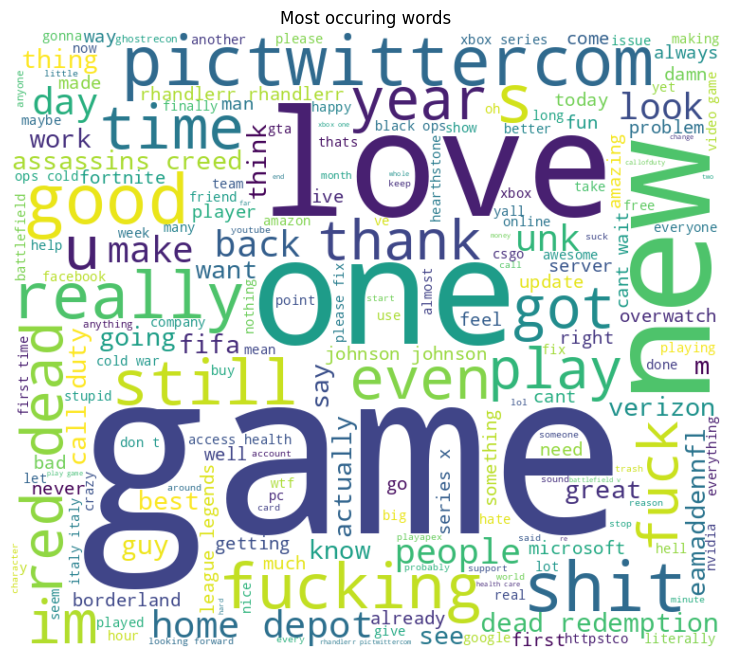

In [ ]:
## Creating a plot to see the stopwords .
plt.figure(figsize=(12,8))
plt.imshow(w_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most occuring words')
plt.show()

In [ ]:
X=new_tweet[['All_cleaned']] ## Creating X dataset for the indipendent column .
X.shape ## shape function will show total no of rows and columns .

(43012, 1)

In [ ]:
y=new_tweet['Rating'] ## y is the target variable .
y.shape ## shape function will show total no of rows and columns .

(43012,)

In [ ]:
## train_test_split will split the dataset into training and testing .
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14) ## test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .

In [ ]:
X_train.head() ## head function will show us the top 5 rows .

,All_cleaned
18786,omfg ty warcraft devs popup empty neck spaces
44595,verizon make help iphone apple watch order ’ s...
52065,hi guys never got red dead redemption honestly...
4335,lets hope treyarch something remove racist ver...
74669,let elim go unnoticed nvidia highlights aut...


In [ ]:
y_test.head() ## head function will show us the top 5 rows .

56555    0
25717    1
2384     0
26019    1
40223    1
Name: Rating, dtype: int64

In [ ]:
## Count vectorizer will vectorize all the words .
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()

In [ ]:
## Creating a list comprehension for both X_train and X_test .
train_vect=[i for i in X_train.All_cleaned]
test_vect=[i for i in X_test.All_cleaned]

In [ ]:
## fit_transform the training data with count_vectorizer and only transform the testing data .
train_vect=CV.fit_transform(train_vect)
test_vect=CV.transform(test_vect)

In [ ]:
## Converting both X_train and X_test data into array .
New_X_train=train_vect.toarray()
New_X_test=test_vect.toarray()

In [ ]:
New_X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

**Evaluation metrics in classification model :**

**1. accuracy_score :** accuracy score is basically the ratio between Total_no_of_correct_predictions/Total no of datapoints .

**2. confusion_matrix :** confusion matrix not only shows total no of correct or wrong prediction but it also shows the number of True Positive , False Positive , True Negative and False Negative .

**3. f1_score :** This is a metric which is a harmonic mean between precision and recall.

**4. classification report :** classification_report shows avg_accuracy , avg f1_score , precision and recall score .

**ML algorithms :**

1. MultinomialNB
2. GaussianNB
3. DecisionTreeClassifier
4. RandomForestClassifier
5. xgboost

In this project i have used 5 different ML algorithms to correctly predict Positive and Negative ratings .

In the end i have compared all the algorithms and commented on which will be best for which purpose .

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB(alpha=0.8,force_alpha=True,fit_prior=True)
MNB.fit(train_vect,y_train)
MNB_pred=MNB.predict(test_vect) ## Predicting the model with X_test dataset .
MNB_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print("Accuracy score of this MultinomialNB text classifier :",accuracy_score(y_test,MNB_pred)*100)
print("f1_score of this MultinomialNB text classifier :", f1_score(y_test,MNB_pred))

Accuracy score of this MultinomialNB text classifier : 88.27304008183762
f1_score of this MultinomialNB text classifier : 0.8777271405022786


In [ ]:
print("Confusion_matrix of MultinomialNB :","\n",confusion_matrix(y_test,MNB_pred))
print("---------------------------------")
print(classification_report(y_test,MNB_pred))

Confusion_matrix of MultinomialNB : 
 [[4966  598]
 [ 663 4526]]
---------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5564
           1       0.88      0.87      0.88      5189

    accuracy                           0.88     10753
   macro avg       0.88      0.88      0.88     10753
weighted avg       0.88      0.88      0.88     10753



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(New_X_train,y_train)
text_pred=GNB.predict(New_X_test) ## Predicting the model with X_test dataset .
text_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print("Accuracy score of this GaussianNB text classifier :",accuracy_score(y_test,text_pred)*100)
print("f1_score of this GaussianNB text classifier :", f1_score(y_test,text_pred))

Accuracy score of this GaussianNB text classifier : 77.73644564307635
f1_score of this GaussianNB text classifier : 0.8089385474860336


In [ ]:
print("Confusion_matrix of GaussianNB :","\n",confusion_matrix(y_test,text_pred))
print("---------------------------------")
print(classification_report(y_test,text_pred))

Confusion_matrix of GaussianNB : 
 [[3291 2273]
 [ 121 5068]]
---------------------------------
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      5564
           1       0.69      0.98      0.81      5189

    accuracy                           0.78     10753
   macro avg       0.83      0.78      0.77     10753
weighted avg       0.83      0.78      0.77     10753



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(New_X_train,y_train)
DC_pred=DC.predict(New_X_test) ## Predicting the model with X_test dataset .
DC_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy score of this DecisionTree text classifier :",accuracy_score(y_test,DC_pred)*100)
print("f1_score of this DecisionTree text classifier :", f1_score(y_test,DC_pred))

Accuracy score of this DecisionTree text classifier : 89.72379800985772
f1_score of this DecisionTree text classifier : 0.8912294517176887


In [ ]:
print("Confusion_matrix of DecisionTreeClassifier :","\n",confusion_matrix(y_test,DC_pred))
print("---------------------------------")
print(classification_report(y_test,DC_pred))

Confusion_matrix of DecisionTreeClassifier : 
 [[5121  443]
 [ 662 4527]]
---------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5564
           1       0.91      0.87      0.89      5189

    accuracy                           0.90     10753
   macro avg       0.90      0.90      0.90     10753
weighted avg       0.90      0.90      0.90     10753



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(New_X_train,y_train)
RF_pred=RF.predict(New_X_test) ## Predicting the model with X_test dataset .
RF_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy score of this RandomForest text classifier :",accuracy_score(y_test,RF_pred)*100)
print("f1_score of this RandomForest text classifier :", f1_score(y_test,RF_pred))

Accuracy score of this RandomForest text classifier : 94.16906909699618
f1_score of this RandomForest text classifier : 0.9387396189545677


In [ ]:
print("Confusion_matrix of RandomForestClassifier :","\n",confusion_matrix(y_test,RF_pred))
print("---------------------------------")
print(classification_report(y_test,RF_pred))

Confusion_matrix of RandomForestClassifier : 
 [[5322  242]
 [ 385 4804]]
---------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5564
           1       0.95      0.93      0.94      5189

    accuracy                           0.94     10753
   macro avg       0.94      0.94      0.94     10753
weighted avg       0.94      0.94      0.94     10753



In [ ]:
import xgboost as xgb
xgb_text=xgb.XGBClassifier()
xgb_text.fit(New_X_train,y_train)
xgb_pred=xgb_text.predict(New_X_test) ## Predicting the model with X_test dataset .
xgb_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy score of this xgboost text classifier :",accuracy_score(y_test,xgb_pred)*100)
print("f1_score of this xgboost text classifier :", f1_score(y_test,xgb_pred))

Accuracy score of this xgboost text classifier : 81.7260299451316
f1_score of this xgboost text classifier : 0.7899518973810796


In [ ]:
print("Confusion_matrix of XGBoostClassifier :","\n",confusion_matrix(y_test,xgb_pred))
print("---------------------------------")
print(classification_report(y_test,xgb_pred))

Confusion_matrix of XGBoostClassifier : 
 [[5093  471]
 [1494 3695]]
---------------------------------
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      5564
           1       0.89      0.71      0.79      5189

    accuracy                           0.82     10753
   macro avg       0.83      0.81      0.81     10753
weighted avg       0.83      0.82      0.81     10753



**Accuracy score comparison :**

1. Accuracy score of this MultinomialNB text classifier : 88.27%
2. Accuracy score of this GaussianNB text classifier : 77.73%
3. Accuracy score of this DecisionTree text classifier : 89.72%
4. Accuracy score of this RandomForest text classifier : 94.16%
5. Accuracy score of this xgboost text classifier : 81.72%

If our goal is to pick the best algorithm depending on accuracy_score then RandomForestClassifier is giving 94.16% accuracy followed by DecisionTreeClassifier and MultinomialNB .

**Most balanced algorithm :**    

RandomForest algorithm is giving us the highest amount of accuracy_score but it also got 95.65 recall score for predicting negative ratings or 0 and 92.58 recall score for predictive positive ratings or 1 . it is the most balanced algorithm .   

**Predict negative rating :**

RandomForest algorithm has correctly predicted 5322 out of 5564 negative ratings and only 242 got misclassified which gives it an accuracy of 95.65% .

**Predict Positive rating :**    

GaussianNB algorithm has correctly predicted 5068 out of 5189 positive ratings and misclassified only 121 which gives it an accuracy of 97.66% .
